In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load dataset
data = pd.read_csv('Breast Cancer Treatment.csv')
data.sample(5)

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),COD to site recode,Race recode,Sex,Vital status recode (study cutoff used),Diagnosis_year,Last_fu _year,interva_years,stutus_5_years
4216,79,0,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Negative,Negative,16,Negative,1,Breast,White,Female,Dead,2014,2016,2,Dead
16975,67,0,1,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,55,Negative,1,Alive,White,Female,Alive,2010,2016,6,Alive
33292,89,98,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Positive,Positive,7,Negative,0,Alive,White,Female,Alive,2011,2016,5,Alive
27482,37,0,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Positive,Negative,1,Positive,3,Alive,White,Female,Alive,2011,2016,5,Alive
30563,63,0,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Positive,Positive,7,Negative,2,Alive,White,Female,Alive,2011,2016,5,Alive


In [ ]:
data.shape

(35349, 19)

**Data Cleaning**

In [ ]:
# Step 1: Remove duplicates (if any)
data = data.drop_duplicates()

In [ ]:
# Step 2: Handle missing values
# Drop columns with too many missing values (threshold: 30% missing)
threshold = 0.3 * len(data)
data = data.dropna(thresh=threshold, axis=1)

In [ ]:
# Fill remaining missing values
for col in data.columns:
    if data[col].dtype == "object":  # Categorical column
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numerical column
        data[col].fillna(data[col].median(), inplace=True)

<ipython-input-6-d2b047af24ce>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-6-d2b047af24ce>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

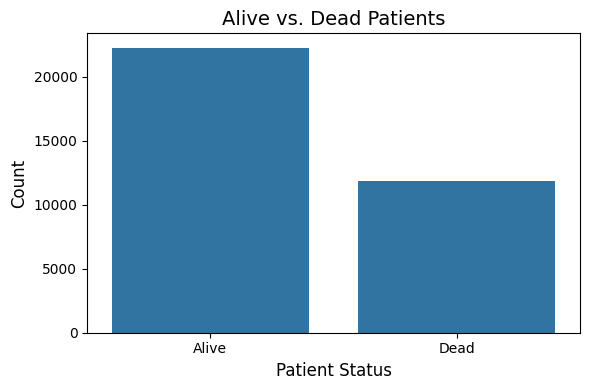

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["stutus_5_years"])

# Add labels and title
plt.xlabel("Patient Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Alive vs. Dead Patients", fontsize=14)  # Adjust labels if needed

plt.tight_layout()
plt.show()

**Label Encoding**

In [ ]:
# Step 3: Convert categorical columns to numerical
label_encoders = {}
categorical_cols = data.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for future decoding if needed

**Smote techniques**

In [ ]:
# Step 4: Define features and target variable
X = data.drop(columns=["stutus_5_years"])  # Features
y = data["stutus_5_years"]  # Target variable


In [ ]:
# Step 5: Apply Undersampling (Reduce Alive cases slightly)
undersampler = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # Keep 70% of majority class
X_under, y_under = undersampler.fit_resample(X, y)

In [ ]:
# Step 6: Apply SMOTE to balance dataset completely
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)


In [ ]:
# Step 7: Combine resampled data into a new DataFrame
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=["stutus_5_years"])], axis=1)

# Step 8: Check the new class distribution
print("Balanced Class Distribution:\n", df_balanced["stutus_5_years"].value_counts())

# Step 9: Save the balanced dataset
df_balanced.to_csv("Balanced_Breast_Cancer_Treatment_Hybrid.csv", index=False)

Balanced Class Distribution:
 stutus_5_years
0    16992
1    16992
Name: count, dtype: int64


**Data Analysis**

In [ ]:
df_balanced.head(20)

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),COD to site recode,Race recode,Sex,Vital status recode (study cutoff used),Diagnosis_year,Last_fu _year,interva_years,stutus_5_years
0,44,0,1,2,1,2,2,2,84,2,1,4,2,0,0,2011,2016,5,0
1,68,0,1,0,0,3,2,2,84,1,8,4,2,0,0,2011,2016,5,0
2,37,3,1,0,1,3,2,2,104,1,23,4,2,0,0,2011,2016,5,0
3,36,0,1,2,1,2,2,1,120,1,2,4,2,0,0,2011,2016,5,0
4,76,0,1,2,0,2,2,1,87,2,2,4,2,0,0,2010,2016,6,0
5,29,9,1,0,1,3,2,2,125,1,11,4,2,0,0,2011,2016,5,0
6,46,0,1,0,1,3,2,2,87,1,1,4,2,0,0,2011,2016,5,0
7,70,0,1,0,0,3,2,2,2,1,2,4,2,0,0,2011,2016,5,0
8,91,98,1,2,0,2,2,2,102,1,0,4,2,0,0,2011,2016,5,0
9,44,2,1,0,1,3,1,1,191,2,2,4,2,0,0,2010,2016,6,0


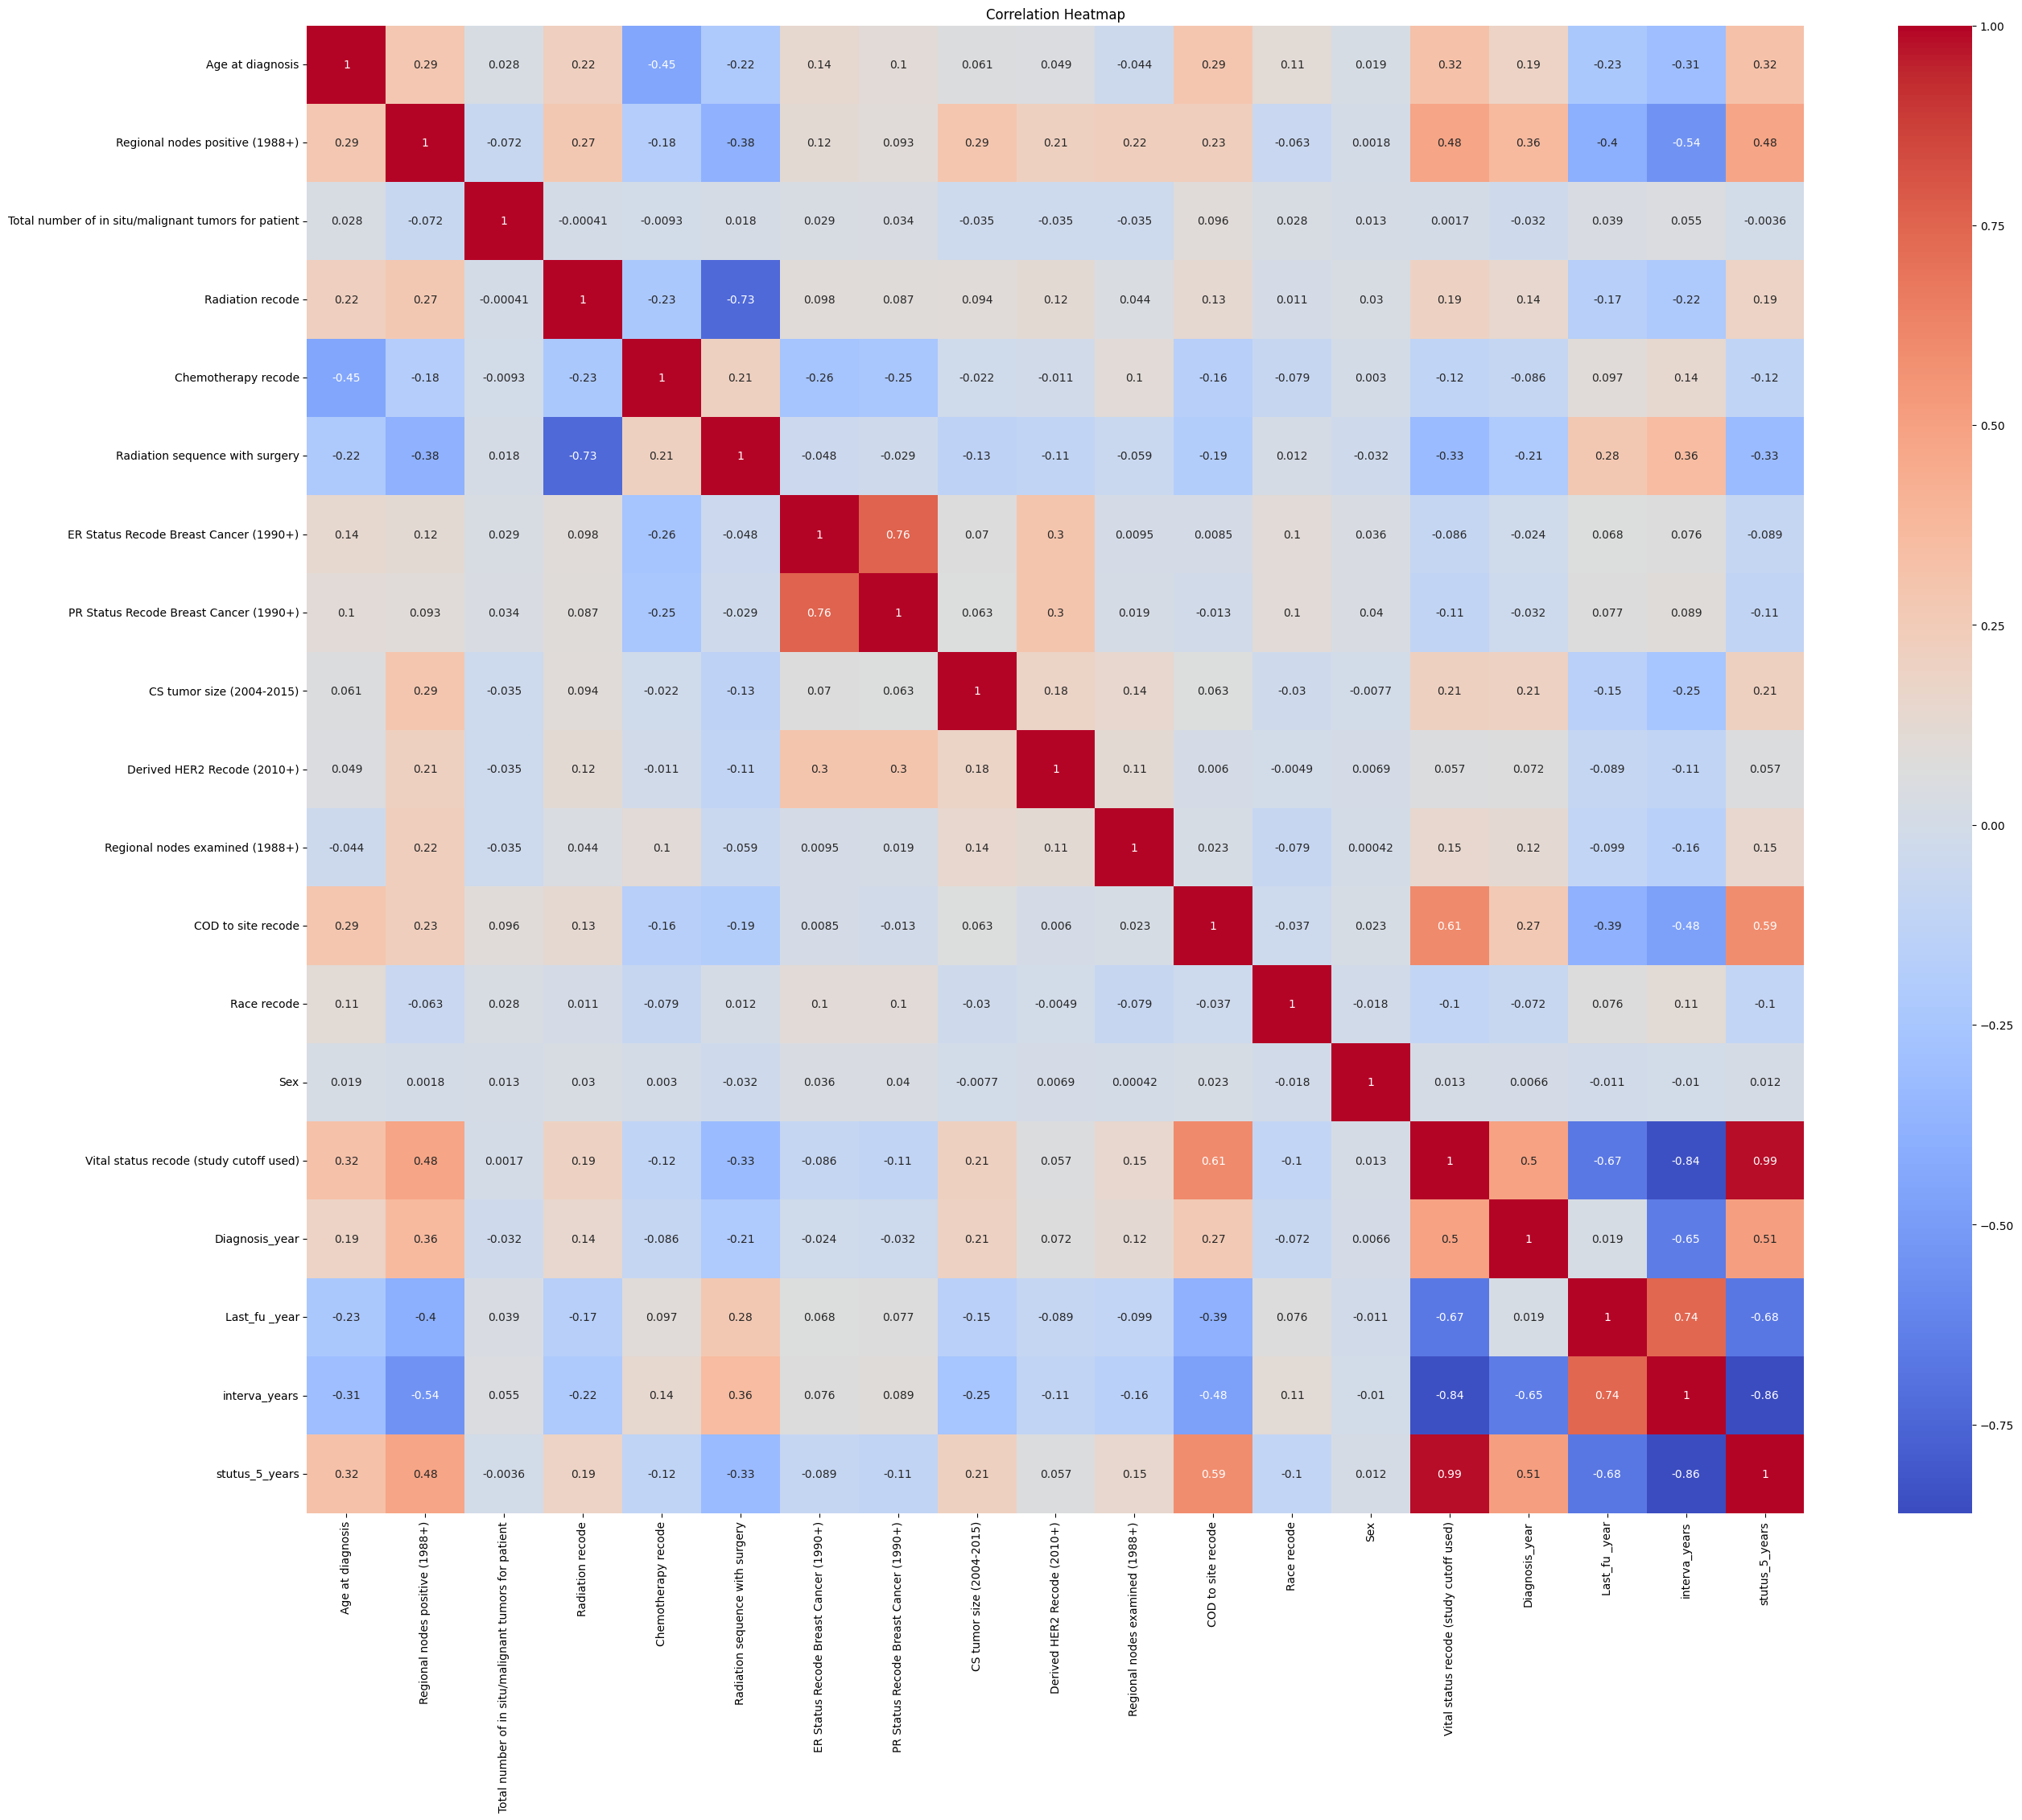

In [ ]:
#Create a coorelation heatmap
plt.figure(figsize=(30, 24))
sns.heatmap(df_balanced.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Decode encoded data
for col, le in label_encoders.items():
    df_balanced[col] = le.inverse_transform(df_balanced[col])


In [ ]:
#Save dataset as decoded data
df_balanced.to_csv("decoded_df_balanced.csv", index=False)
df_balanced.tail()

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),COD to site recode,Race recode,Sex,Vital status recode (study cutoff used),Diagnosis_year,Last_fu _year,interva_years,stutus_5_years
33979,65,0,1,Combination of beam with implants or isotopes,Yes,No radiation and/or cancer-directed surgery,Positive,Positive,19,Positive,2,Breast,White,Female,Dead,2011,2013,2,Dead
33980,77,0,1,Combination of beam with implants or isotopes,No/Unknown,No radiation and/or cancer-directed surgery,Negative,Negative,12,Negative,14,Alzheimers (ICD-9 and 10 only),Unknown,Female,Dead,2011,2014,3,Dead
33981,76,0,1,Combination of beam with implants or isotopes,No/Unknown,No radiation and/or cancer-directed surgery,Positive,Positive,18,Negative,1,Other Cause of Death,White,Female,Dead,2011,2013,1,Dead
33982,83,99,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Positive,Unknown,999,Unknown,99,Breast,White,Female,Dead,2011,2011,0,Dead
33983,75,98,1,Radioisotopes (1988+),No/Unknown,No radiation and/or cancer-directed surgery,Negative,Negative,40,Positive,0,Breast,Black,Female,Dead,2011,2011,0,Dead


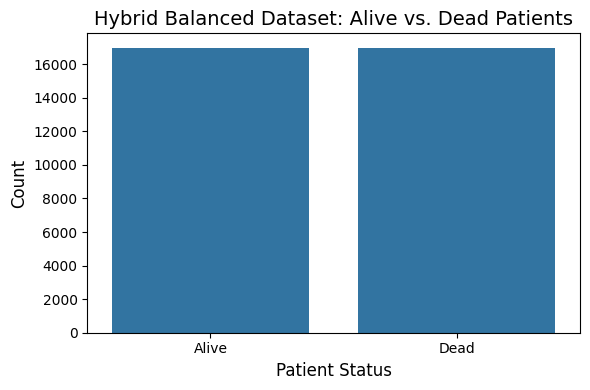

In [ ]:
# Step 10: Plot bar chart of Alive vs. Dead Patients
plt.figure(figsize=(6, 4))
sns.countplot(x=df_balanced["stutus_5_years"])

# Add labels and title
plt.xlabel("Patient Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Hybrid Balanced Dataset: Alive vs. Dead Patients", fontsize=14)  # Adjust labels if needed

plt.tight_layout()
plt.show()

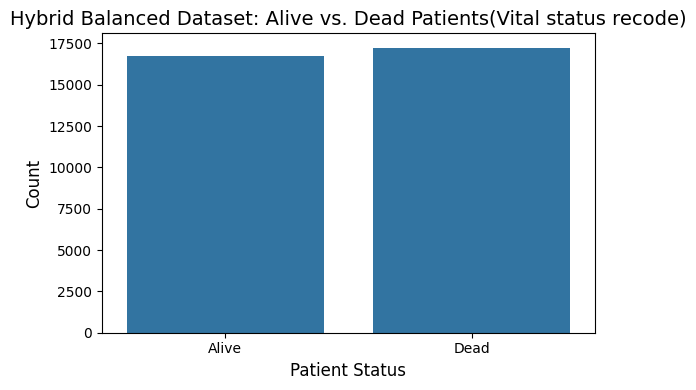

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_balanced["Vital status recode (study cutoff used)"])

# Add labels and title
plt.xlabel("Patient Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Hybrid Balanced Dataset: Alive vs. Dead Patients(Vital status recode)", fontsize=14)  # Adjust labels if needed

plt.tight_layout()
plt.show()

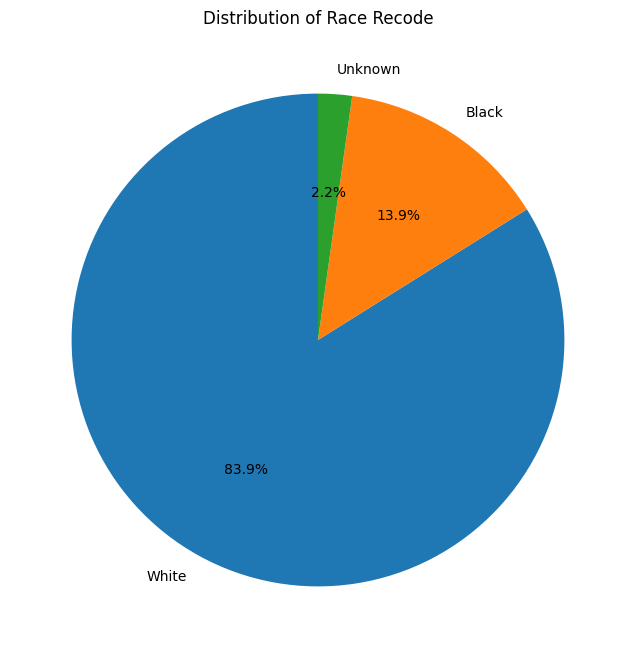

In [ ]:
# Assuming 'Race recode' is a column in your DataFrame
race_counts = df_balanced['Race recode'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Race Recode')
plt.show()

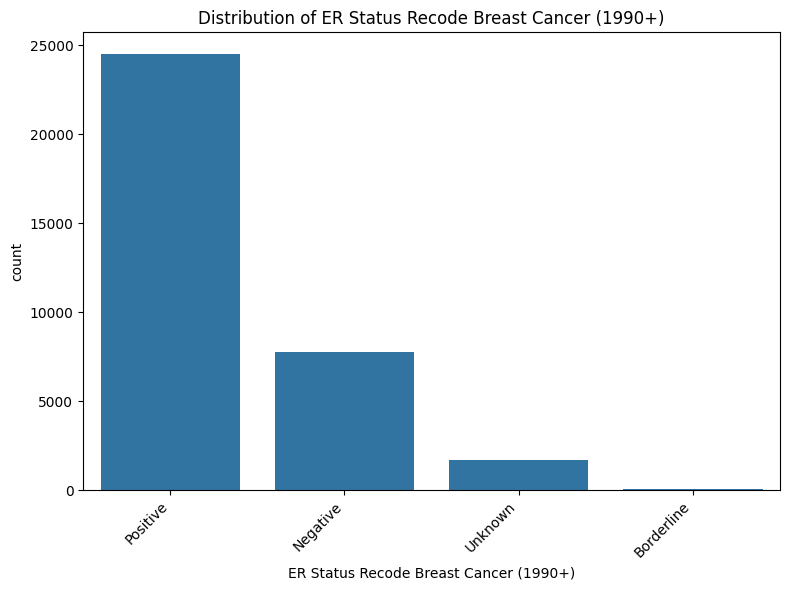

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for ER Status Recode Breast Cancer (1990+)
plt.figure(figsize=(8, 6))
sns.countplot(x='ER Status Recode Breast Cancer (1990+)', data=df_balanced)
plt.title('Distribution of ER Status Recode Breast Cancer (1990+)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

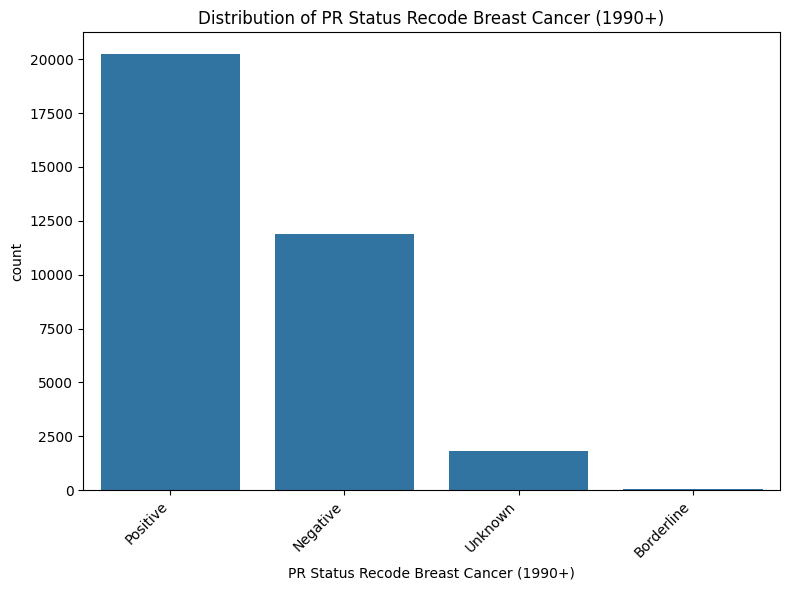

In [ ]:
# Bar chart for PR Status Recode Breast Cancer (1990+)
plt.figure(figsize=(8, 6))
sns.countplot(x='PR Status Recode Breast Cancer (1990+)', data=df_balanced)
plt.title('Distribution of PR Status Recode Breast Cancer (1990+)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

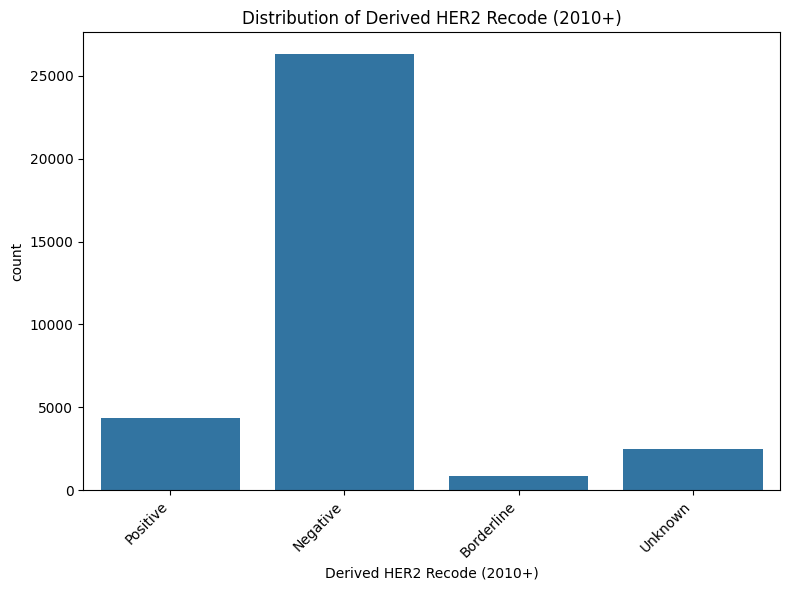

In [ ]:
# Bar chart for PR Status Recode Breast Cancer (1990+)
plt.figure(figsize=(8, 6))
sns.countplot(x='Derived HER2 Recode (2010+)', data=df_balanced)
plt.title('Distribution of Derived HER2 Recode (2010+)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

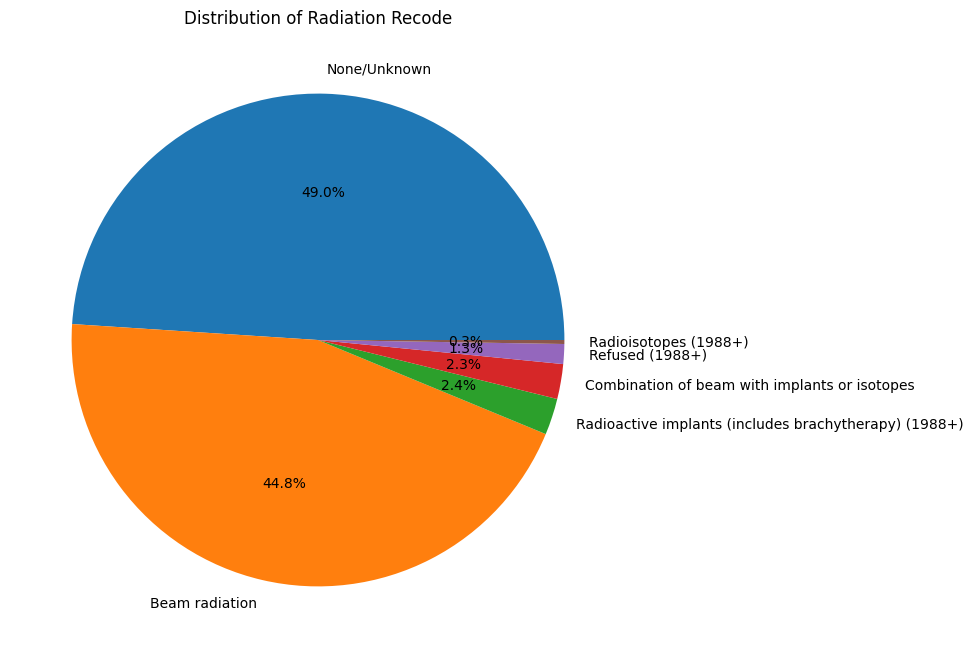

In [ ]:
#Create pie chart for radiation record
radiation_counts = df_balanced['Radiation recode'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(radiation_counts, labels=radiation_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Radiation Recode')
plt.show()

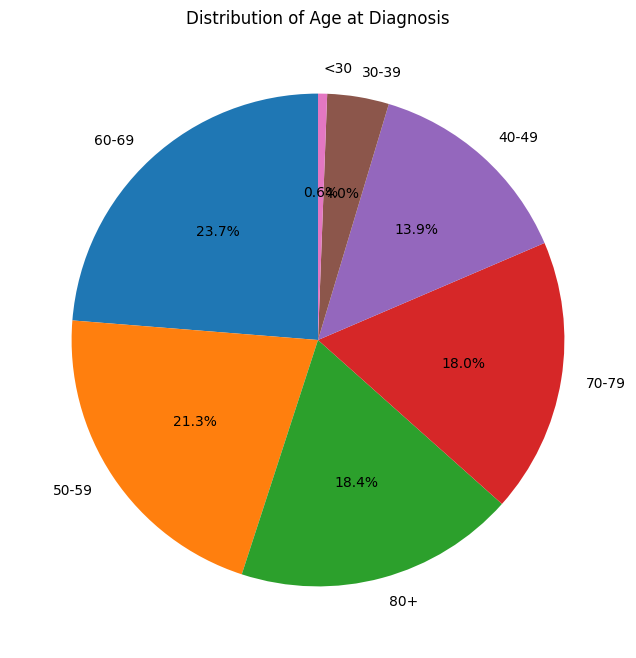

In [ ]:
# Define age ranges and labels
age_bins = [0, 30, 40, 50, 60, 70, 80, 100]  # Customize these bins as needed
age_labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Create a new column with age categories
df_balanced['Age_Group'] = pd.cut(df_balanced['Age at diagnosis'], bins=age_bins, labels=age_labels, right=False)

# Calculate the frequency of each age group
age_counts = df_balanced['Age_Group'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age at Diagnosis')
plt.show()

In [ ]:
#Drop one of the two highly correlated columns
df = df_balanced.drop(columns=['Vital status recode (study cutoff used)', 'Diagnosis_year', 'Last_fu _year', 'Sex', 'COD to site recode'])


In [ ]:
#Save dataset as decoded data
df.to_csv("decoded_df_balanced_filtered.csv", index=False)
df.tail()

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),Race recode,interva_years,stutus_5_years,Age_Group
33979,65,0,1,Combination of beam with implants or isotopes,Yes,No radiation and/or cancer-directed surgery,Positive,Positive,19,Positive,2,White,2,Dead,60-69
33980,77,0,1,Combination of beam with implants or isotopes,No/Unknown,No radiation and/or cancer-directed surgery,Negative,Negative,12,Negative,14,Unknown,3,Dead,70-79
33981,76,0,1,Combination of beam with implants or isotopes,No/Unknown,No radiation and/or cancer-directed surgery,Positive,Positive,18,Negative,1,White,1,Dead,70-79
33982,83,99,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Positive,Unknown,999,Unknown,99,White,0,Dead,80+
33983,75,98,1,Radioisotopes (1988+),No/Unknown,No radiation and/or cancer-directed surgery,Negative,Negative,40,Positive,0,Black,0,Dead,70-79


In [ ]:
df.shape

(33984, 15)

In [ ]:
for col in df.columns:
        if df[col].dtype == 'object':  # Categorical column
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # Numerical column
            if df[col].isnull().sum() > 0:
                if df[col].nunique() > 10:
                    df[col].fillna(df[col].median(), inplace=True)
                else:
                    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-27-991f6595e41e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower_bound, df[col].median(), df[col])
        df[col] = np.where(df[col] > upper_bound, df[col].median(), df[col])

In [ ]:
# prompt: check if dataset has any null or nun or NA value or Unknown/None value

# Check for null values
print(df.isnull().sum())


Age at diagnosis                                        0
Regional nodes positive (1988+)                         0
Total number of in situ/malignant tumors for patient    0
Radiation recode                                        0
Chemotherapy recode                                     0
Radiation sequence with surgery                         0
ER Status Recode Breast Cancer (1990+)                  0
PR Status Recode Breast Cancer (1990+)                  0
CS tumor size (2004-2015)                               0
Derived HER2 Recode (2010+)                             0
Regional nodes examined (1988+)                         0
Race recode                                             0
interva_years                                           0
stutus_5_years                                          0
Age_Group                                               0
dtype: int64


In [ ]:
# Check for 'Unknown' or 'None' values (adjust column names as needed)
for col in df.columns:
  if df[col].dtype == 'object':  # Check only string columns
    print(f"Column '{col}':")
    print(df[col].value_counts())
    # check for 'unknown', 'Unknown', 'NONE', 'None' etc.
    unknown_counts = df[col].isin(['Unknown', 'unknown', 'NONE', 'None', ' ']).sum()
    print(f"Number of 'Unknown'/'None' values: {unknown_counts}")

Column 'Radiation recode':
Radiation recode
None/Unknown                                             16633
Beam radiation                                           15227
Radioactive implants (includes brachytherapy) (1988+)      812
Combination of beam with implants or isotopes              782
Refused (1988+)                                            442
Radioisotopes (1988+)                                       88
Name: count, dtype: int64
Number of 'Unknown'/'None' values: 0
Column 'Chemotherapy recode':
Chemotherapy recode
No/Unknown    20984
Yes           13000
Name: count, dtype: int64
Number of 'Unknown'/'None' values: 0
Column 'Radiation sequence with surgery':
Radiation sequence with surgery
No radiation and/or cancer-directed surgery               19465
Radiation after surgery                                   14297
Radiation prior to surgery                                  109
Radiation before and after surgery                           50
Intraoperative radiation        

In [ ]:
# prompt: Remove all 'Unknown', 'unknown', 'NONE', 'None', ' ' from dataset

import pandas as pd
import numpy as np

# Load your DataFrame (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('decoded_df_balanced_filtered.csv')

# Define a list of values to remove
values_to_remove = ['Unknown', 'unknown', 'NONE', 'None', ' ']

# Iterate through the columns and replace the specified values with NaN
for col in df.columns:
    if df[col].dtype == 'object':  # Check only string columns
        df[col] = df[col].replace(values_to_remove, np.nan)

# Now you can either remove rows with NaN values or fill them
# with appropriate values based on your needs.
# Example: Remove rows with any NaN values:
df = df.dropna()

# Example: Fill NaN values with the mode for categorical columns and median for numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        if df[col].isnull().sum() > 0:
          if df[col].nunique() > 10:
            df[col].fillna(df[col].median(), inplace=True)
          else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Save the cleaned DataFrame to a new CSV file
df.to_csv("cleaned_dataset.csv", index=False)


<ipython-input-30-295091f12c48>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-30-295091f12c48>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
df = pd.read_csv('cleaned_dataset.csv')
df.sample(5)

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),Race recode,interva_years,stutus_5_years
17961,61,0,1,Beam radiation,No,Radiation after surgery,Negative,Negative,20,Negative,5.0,White,2.0,Dead
18270,61,98,1,NaN,No,No radiation and/or cancer-directed surgery,Positive,Positive,999,Negative,0.0,White,5.0,Dead
7174,63,1,2,Beam radiation,Yes,Radiation after surgery,Positive,Positive,14,Negative,15.0,White,6.0,Alive
15003,29,0,1,Beam radiation,Yes,Radiation after surgery,Positive,Negative,24,Negative,4.0,White,2.0,Dead
6086,47,0,1,Beam radiation,No,Radiation after surgery,Positive,Positive,9,Negative,10.0,White,6.0,Alive


In [ ]:
df.shape

(30690, 15)

In [ ]:
df.isnull().sum()

,0
Age at diagnosis,0
Regional nodes positive (1988+),0
Total number of in situ/malignant tumors for patient,0
Radiation recode,0
Chemotherapy recode,0
Radiation sequence with surgery,0
ER Status Recode Breast Cancer (1990+),0
PR Status Recode Breast Cancer (1990+),0
CS tumor size (2004-2015),0
Derived HER2 Recode (2010+),0


In [ ]:
df.isna()

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),COD to site recode,Race recode,interva_years,stutus_5_years,Age_Group
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30660,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30661,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


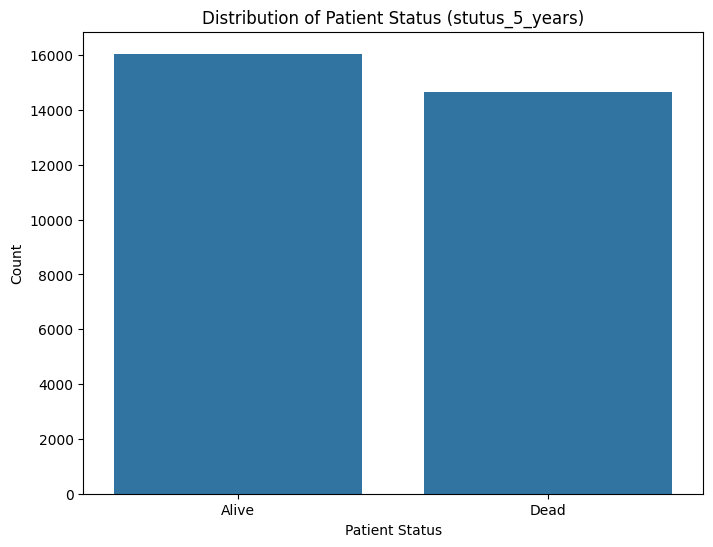

In [ ]:
# prompt: plot bar chart for stutus_5_years

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your DataFrame (replace 'cleaned_dataset.csv' with the actual file path)
df = pd.read_csv('cleaned_dataset.csv')

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='stutus_5_years', data=df)
plt.title('Distribution of Patient Status (stutus_5_years)')
plt.xlabel('Patient Status')
plt.ylabel('Count')
plt.show()


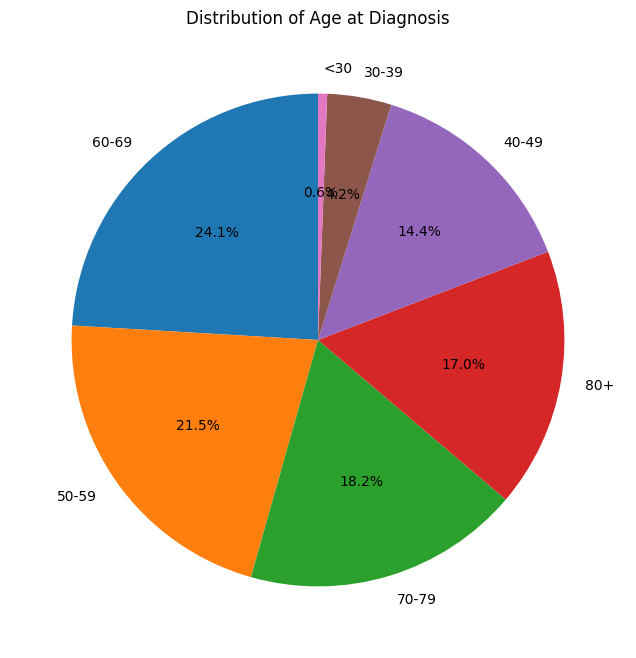

In [ ]:
# prompt: plot a pie chart for age groups of age column

import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame (replace 'cleaned_dataset.csv' with the actual file path)
df = pd.read_csv('cleaned_dataset.csv')

# Define age ranges and labels
age_bins = [0, 30, 40, 50, 60, 70, 80, 100]  # Customize these bins as needed
age_labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Create a new column with age categories
df['Age_Group'] = pd.cut(df['Age at diagnosis'], bins=age_bins, labels=age_labels, right=False)

# Calculate the frequency of each age group
age_counts = df['Age_Group'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age at Diagnosis')
plt.show()


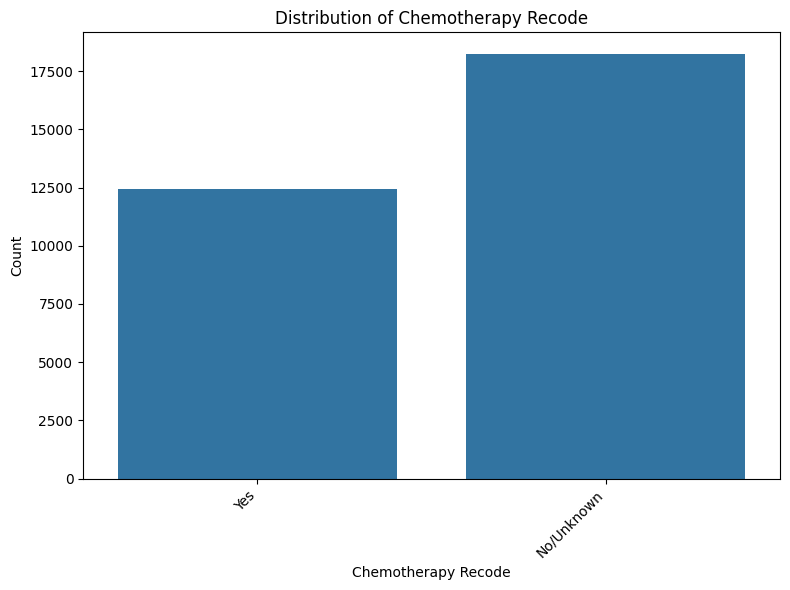

In [ ]:
# prompt: plot bar graph for chemotherapy_recode

import matplotlib.pyplot as plt
# Assuming 'chemotherapy_recode' is a column in your DataFrame 'df'
plt.figure(figsize=(8, 6))
sns.countplot(x='Chemotherapy recode', data=df)
plt.title('Distribution of Chemotherapy Recode')
plt.xlabel('Chemotherapy Recode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


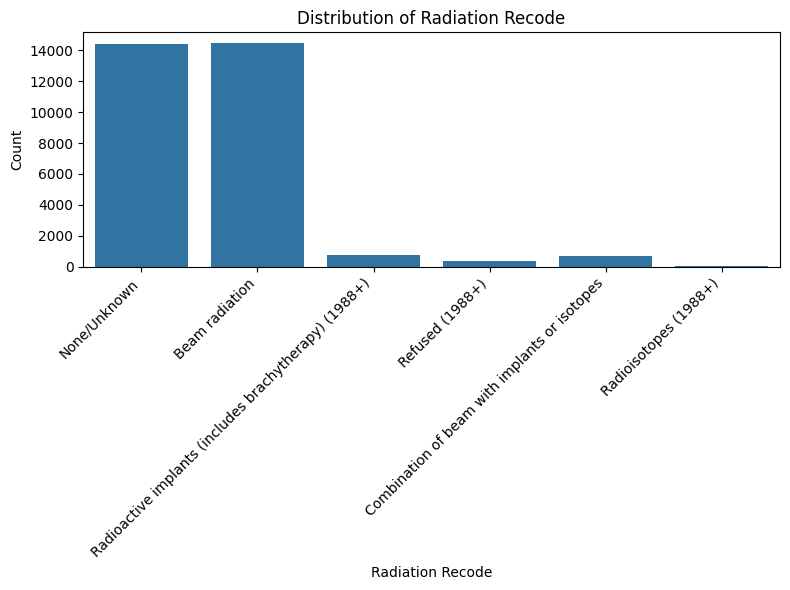

In [ ]:
# prompt: Plot bar graph for radiation recode

import matplotlib.pyplot as plt
# Assuming 'Radiation recode' is a column in your DataFrame 'df'
plt.figure(figsize=(8, 6))
sns.countplot(x='Radiation recode', data=df)
plt.title('Distribution of Radiation Recode')
plt.xlabel('Radiation Recode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


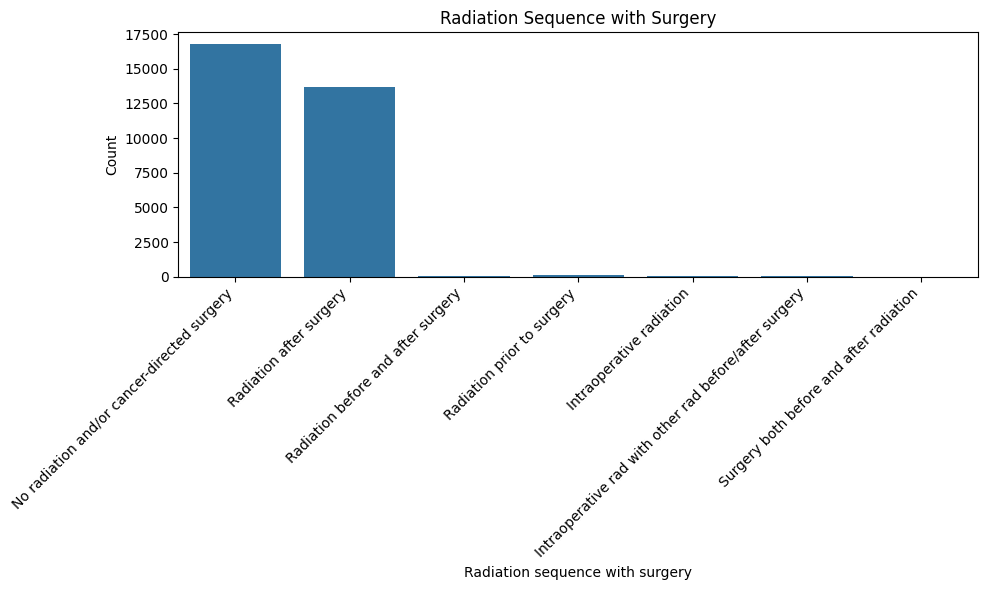

In [ ]:
# prompt: plot bar chart for radiation sequence with surgery

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your DataFrame (replace 'cleaned_dataset.csv' with the actual file path)
df = pd.read_csv('cleaned_dataset.csv')

# Assuming 'Radiation recode' and 'Surgery' are columns in your DataFrame
# and 'Surgery' indicates whether surgery was performed or not.
# Replace 'Surgery' with the actual column name if it's different.

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Radiation sequence with surgery', data=df)
plt.title('Radiation Sequence with Surgery')
plt.xlabel('Radiation sequence with surgery')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


In [ ]:
label_encoders = {}
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future decoding if needed

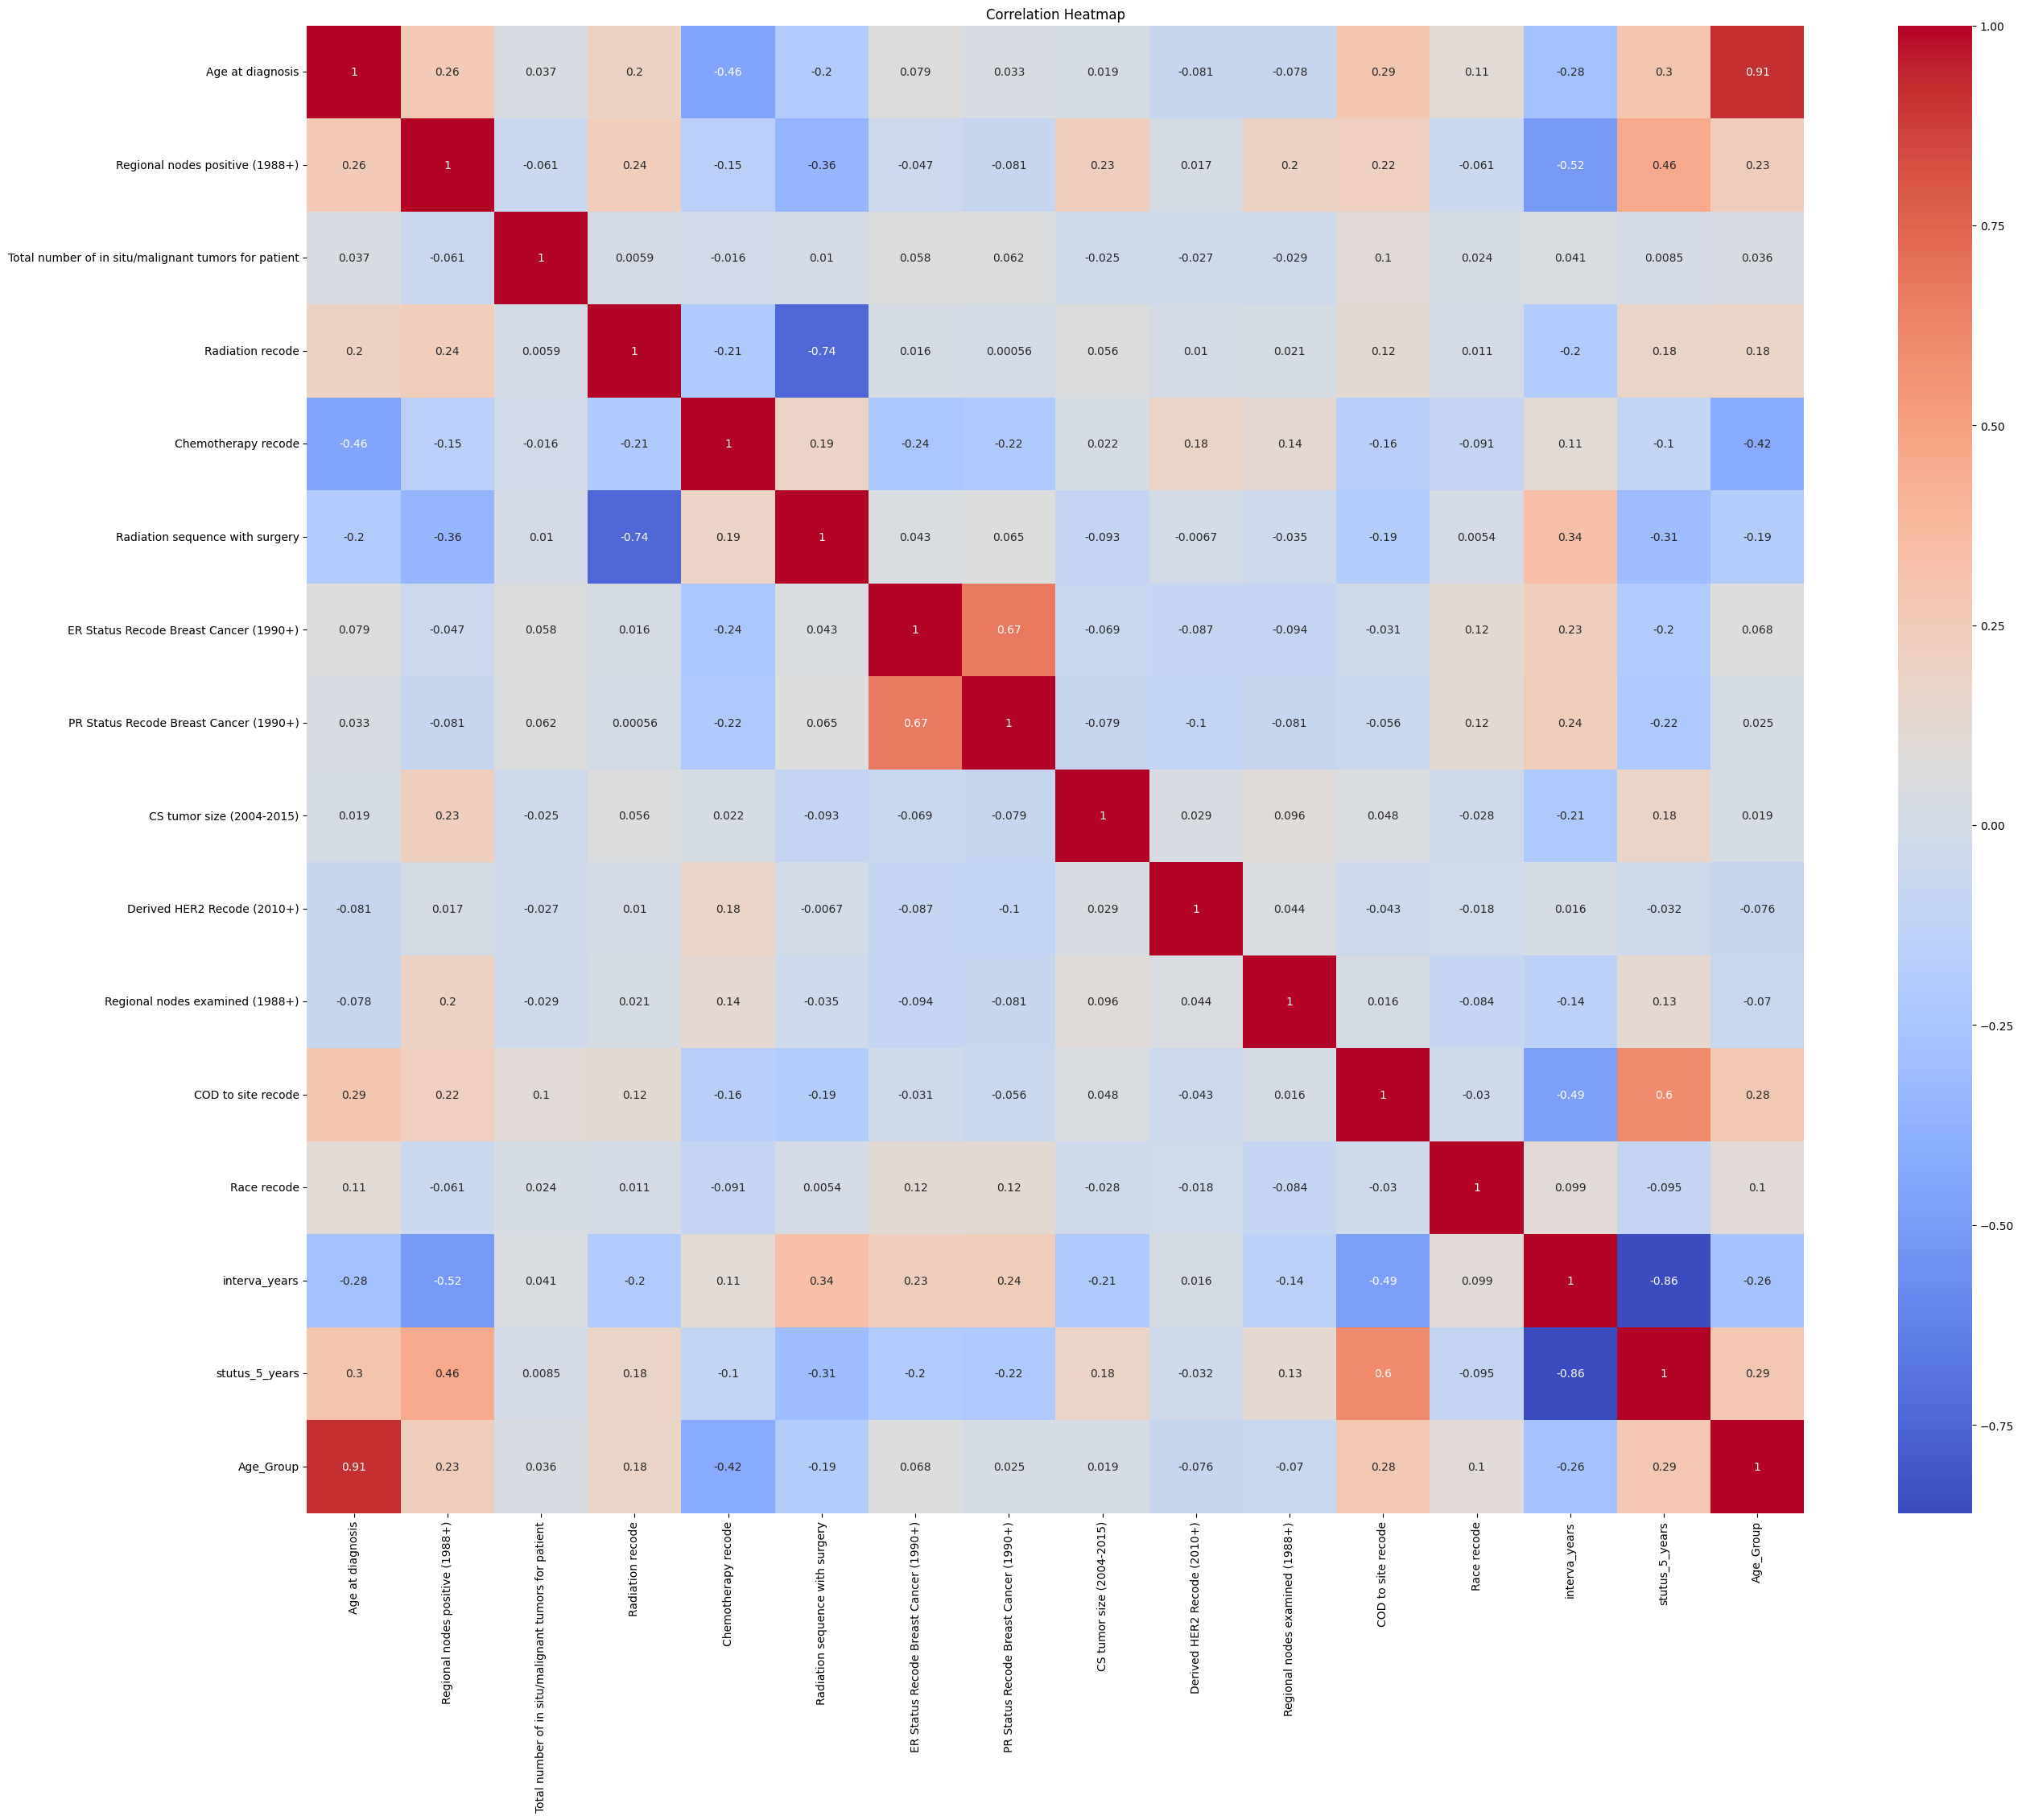

In [ ]:
#Plot heatmap for dataset
plt.figure(figsize=(30, 24))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()